In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

tumor\Testing\glioma_tumor\image(1).jpg
tumor\Testing\glioma_tumor\image(10).jpg
tumor\Testing\glioma_tumor\image(100).jpg
tumor\Testing\glioma_tumor\image(11).jpg
tumor\Testing\glioma_tumor\image(12).jpg
tumor\Testing\glioma_tumor\image(13).jpg
tumor\Testing\glioma_tumor\image(14).jpg
tumor\Testing\glioma_tumor\image(15).jpg
tumor\Testing\glioma_tumor\image(16).jpg
tumor\Testing\glioma_tumor\image(17).jpg
tumor\Testing\glioma_tumor\image(18).jpg
tumor\Testing\glioma_tumor\image(19).jpg
tumor\Testing\glioma_tumor\image(2).jpg
tumor\Testing\glioma_tumor\image(20).jpg
tumor\Testing\glioma_tumor\image(21).jpg
tumor\Testing\glioma_tumor\image(22).jpg
tumor\Testing\glioma_tumor\image(23).jpg
tumor\Testing\glioma_tumor\image(24).jpg
tumor\Testing\glioma_tumor\image(25).jpg
tumor\Testing\glioma_tumor\image(26).jpg
tumor\Testing\glioma_tumor\image(27).jpg
tumor\Testing\glioma_tumor\image(28).jpg
tumor\Testing\glioma_tumor\image(29).jpg
tumor\Testing\glioma_tumor\image(3).jpg
tumor\Testing\glio

In [19]:
# Import libraries

import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


# IMPORTING REQUIRED PACKAGES

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import imutils

# Declaring X_train, Y_train, Creating Labels, Adding the images and Labels to X_train and Y_train

In [21]:
X_train=[]
Y_train=[]
image_size=150


In [22]:
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [23]:
for i in labels:
    folderPath=os.path.join(r'tumor/Training',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
   folderPath=os.path.join(r'tumor/Testing',i)
   for j in os.listdir(folderPath):
       img=cv2.imread(os.path.join(folderPath,j))
       img=cv2.resize(img,(image_size,image_size))
       X_train.append(img)
       Y_train.append(i)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [24]:
# Function to crop images

def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


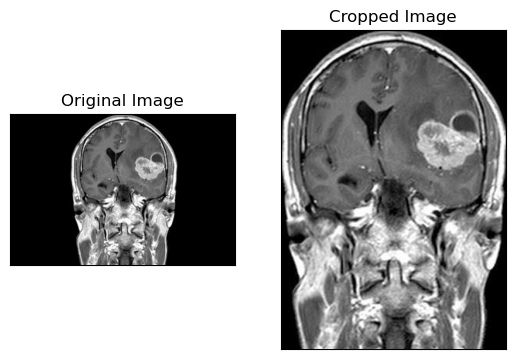

In [25]:
# Check the crop

example_img = cv2.imread("tumor/Testing/glioma_tumor/image(97).jpg")
cropped_image_example = crop_image(example_img, plot=True)

# Now X_train contains images and Y_train conatins Lables

In [26]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

# Splitting the data

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [29]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [30]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [33]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 77s 960ms/step - accuracy: 0.2662 - loss: 3.5798 - val_accuracy: 0.2823 - val_loss: 1.3606
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 69s 927ms/step - accuracy: 0.3322 - loss: 1.3311 - val_accuracy: 0.5238 - val_loss: 1.1086
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 69s 930ms/step - accuracy: 0.5269 - loss: 1.0952 - val_accuracy: 0.5391 - val_loss: 1.0717
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 925ms/step - accuracy: 0.5831 - loss: 0.9589 - val_accuracy: 0.5391 - val_loss: 0.9788
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 918ms/step - accuracy: 0.6029 - loss: 0.8917 - val_accuracy: 0.5969 - val_loss: 0.9073
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 70s 945ms/step - accuracy: 0.6695 - loss: 0.7636 - val_accuracy: 0.7126 - val_loss: 0.7050
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7175 - loss: 0.6792 - val_accuracy: 0.6735 - val_loss: 0.7733
Epoch 8/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7543 - loss: 0.6017 - val_accuracy: 

In [34]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step


In [35]:
model.save('model.h5')

In [36]:
model.save('my_model.keras')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Trainig Accuracy vs Validation Accuracy

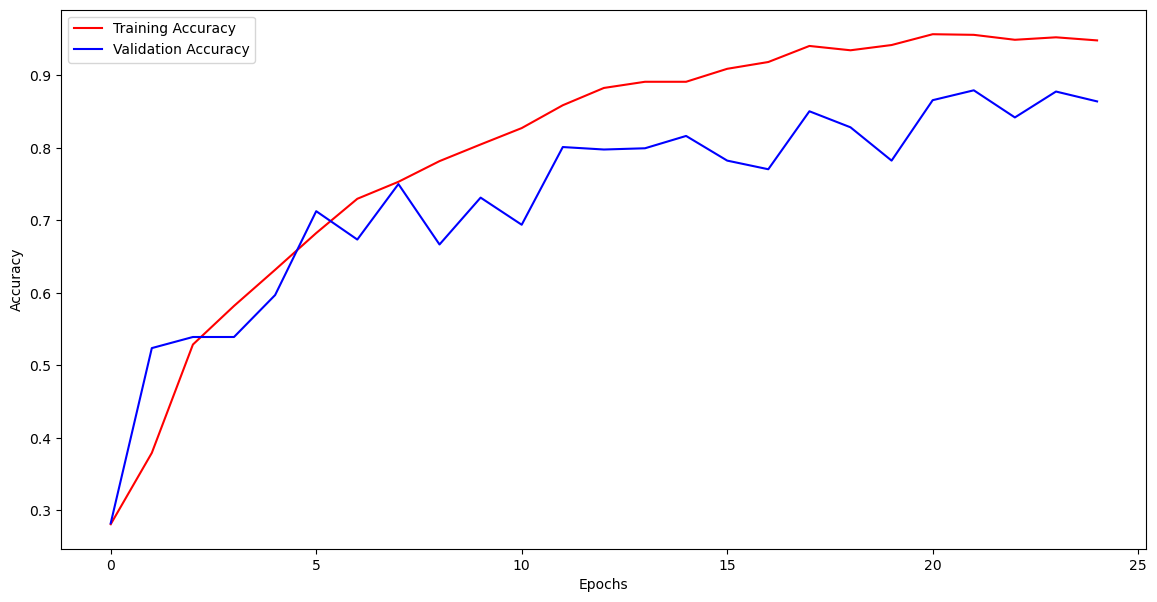

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


# Plotting Trainig Loss vs Validation Loss

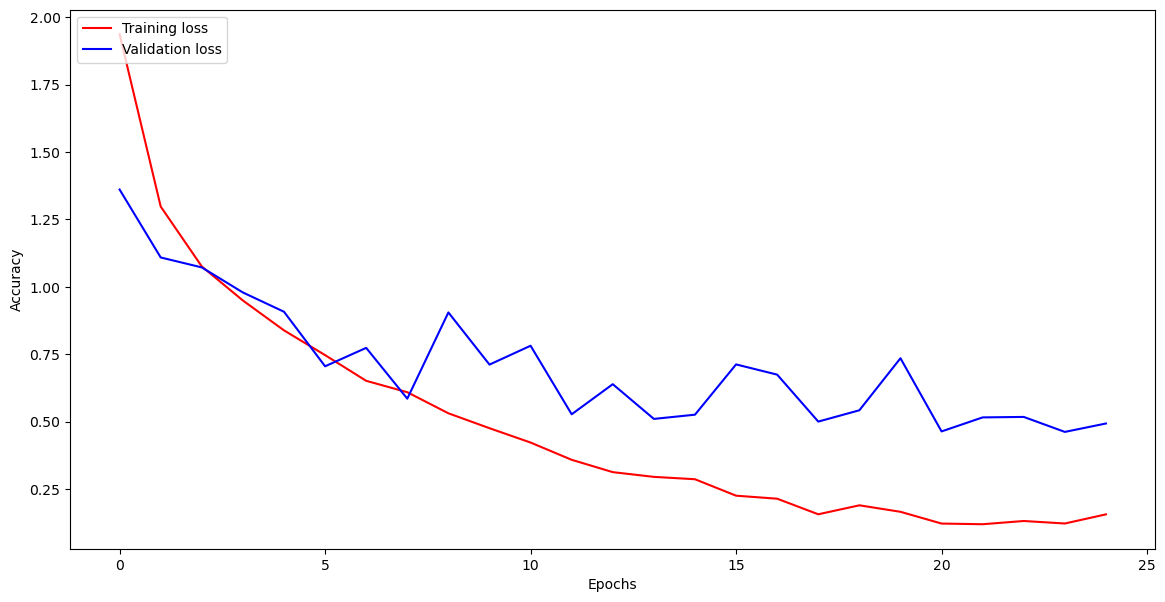

In [43]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [44]:
img = cv2.imread('tumor/Testing/glioma_tumor/image(97).jpg', 0)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150)

In [45]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 150, 150)

In [1]:
#img_array = img_array.reshape(1,150,150,3)
#img_array.shape

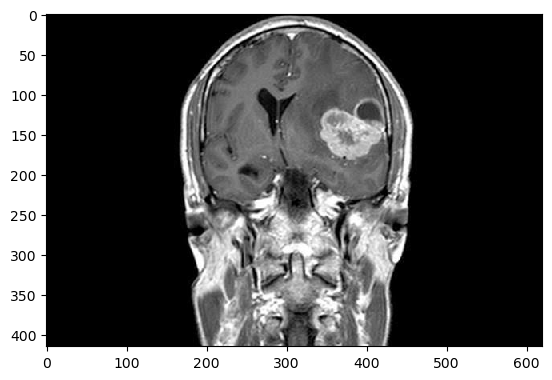

In [49]:
from tensorflow.keras.preprocessing import image
img = image.load_img('tumor/Testing/glioma_tumor/image(97).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [50]:
a=model.predict(img_array)
indices = a.argmax()
labels[indices]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'glioma_tumor'

# Prediction Image

In [47]:
import numpy as np
import cv2
from keras.models import load_model

# Load the model
model = load_model('model.h5')

# Load and preprocess the image
img = cv2.imread('tumor/Testing/glioma_tumor/image(93).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model
predictions = model.predict(img_array)
indices = predictions.argmax()

print(labels[indices])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
glioma_tumor


In [51]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Optionally, you can print the test loss as well
print(f'Test Loss: {test_loss:.4f}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8667 - loss: 0.5141
Test Accuracy: 85.63%
Test Loss: 0.5320
